# Python para estudos de Tempo e Clima.

Data: 19/10/2018

Laboratório de Meteorologia Sinótica (C06)

## Seaborn

### . Uma biblioteca de visualização de dados baseada em Matplotlib.
### . Interface da alto nível para a produção de gráficos estatísticos.     

Instalação: pip install seaborn / conda install seaborn

Versão mais atual: 0.9

#### Exemplo 1: Plot simples de séries temporais

Importar bibliotecas:

In [1]:
import matplotlib.pyplot    as plt
import seaborn              as sns
import numpy                as np

In [2]:
# ler arquivo de dados

nino3  =  np.loadtxt('nino3.asc')

In [3]:
# importar estilos do seaborn
# 'darkgrid', 'whitegrid', 'white', 'dark'.
sns.set(style="darkgrid")


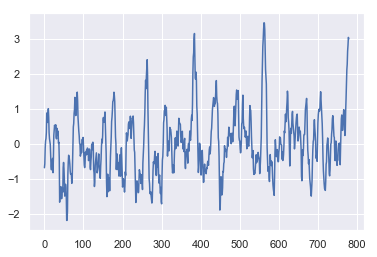

In [4]:
# plotar série

sns.lineplot(data=nino3)
plt.show()

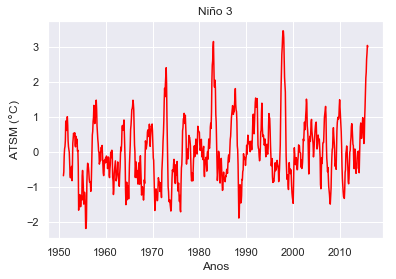

In [5]:
# array de tempo
time  =  np.arange(len(nino3)) * (1/12) + 1951.

#print (time)

sns.lineplot(time, nino3, color='Red')

plt.title(r'Niño 3')
plt.xlabel('Anos')
plt.ylabel(r'ATSM ($\degree$C)')

plt.show()

#### Exemplo 2: Histograma e Distribuição de Probabilidade

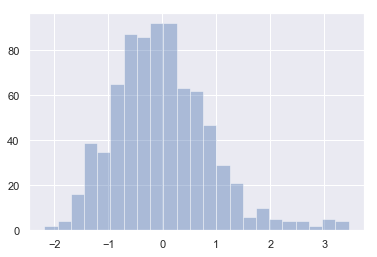

In [6]:
# plotar apenas o histograma

sns.distplot(nino3, kde=False)
plt.show()

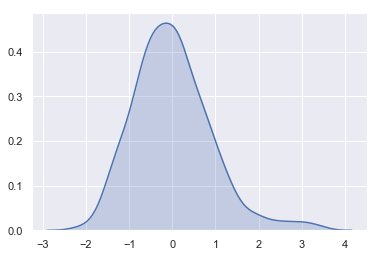

In [7]:
# plotar só a função densidade de probabilidade

# obs: a função sns.kdeplot() também faz a mesma coisa

sns.distplot(nino3, hist=False, kde_kws={"shade": True})
plt.show()

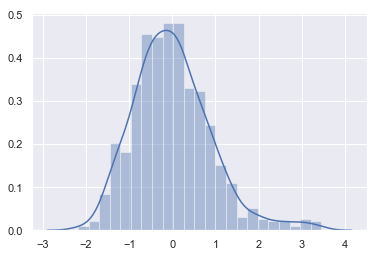

In [8]:
# plotar o histograma e a função densidade de probabilidade

sns.distplot(nino3)
plt.show()

#### Exemplo 3: Boxplot

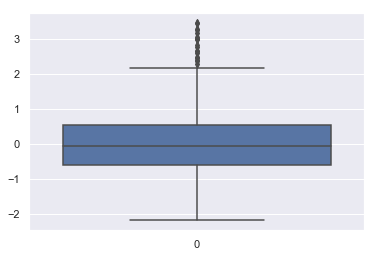

In [9]:
sns.boxplot(data=nino3)
plt.show()

Boxplot mensal:

In [10]:
nino3res =  np.reshape(nino3, (65,12), order='C')

print (nino3.shape, nino3res.shape)

(780,) (65, 12)


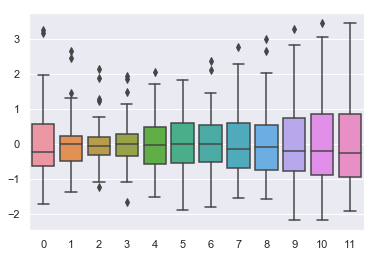

In [11]:
sns.boxplot(data=nino3res)
plt.show()

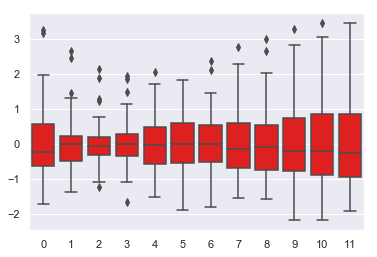

In [12]:
# padronizar as cores

sns.boxplot(data=nino3res, color='Red')
plt.show()

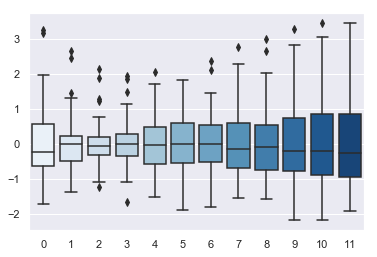

In [13]:
# paleta de cores

sns.boxplot(data=nino3res, palette='Blues')
plt.show()

In [14]:
# importar o índice Oscilação Sul 
# fonte: ftp://ftp.bom.gov.au/anon/home/ncc/www/sco/soi/soiplaintext.html

ios  =  np.loadtxt('ios.asc')

print (ios.shape)
#print (ios)

(65, 13)


Problema: remover as colunas do anos e reestruturar os dados para um vetor coluna

In [15]:
ios  =  ios[:,1:]

print (ios.shape)
#print (ios)

iosrs  =  np.reshape(ios, (65*12), order='C')

print (nino3.shape, iosrs.shape)

(65, 12)
(780,) (780,)


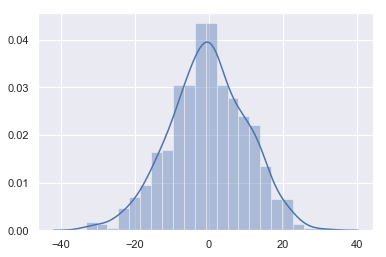

In [16]:
# plotar histograma e função densidade de probabilidade do IOS

sns.distplot(iosrs)
plt.show()

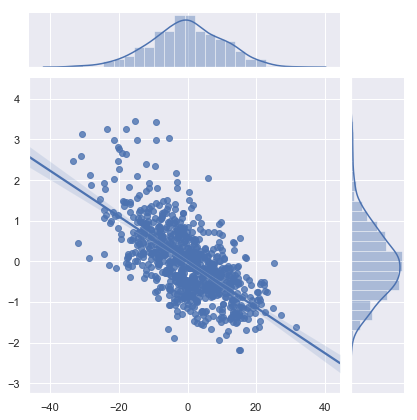

In [17]:
# plotar histogramas e tudo mais o que tem direito das duas séries

sns.jointplot(iosrs, nino3, kind='reg')
plt.show()

### [Outras aplicações na galeria oficial do Seaborn.](https://seaborn.pydata.org/examples/index.html)

## Cartopy

### . Biblioteca de projeções cartográficas e análise geoespacial de dados.

### . Criada pelo UK Met Office e também baseada em Matplotlib. 

Instalação: conda install -c conda-forge cartopy

Versão mais atual: 0.16

#### Exemplo 1: projeções globais.

Importar bibliotecas:

In [18]:
import cartopy             as cartopy
import cartopy.crs         as ccrs
import cartopy.feature     as cf

from cartopy.mpl.ticker    import LongitudeFormatter, LatitudeFormatter

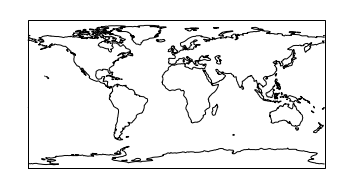

In [19]:
# projeção global em Plate Carrée (equiretangular)

plt.figure(figsize=(10, 3))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines(resolution='110m')
plt.show()

Obs: o parâmetro "projections" acima determina o tipo de projeção utilizada. A lista de projeções disponíveis no Cartopy pode ser vista [aqui](https://scitools.org.uk/cartopy/docs/v0.15/crs/projections.html).

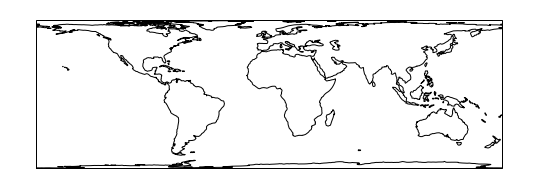

In [20]:
# projeção cilíndrica de Lambert

plt.figure(figsize=(10, 3))
ax = plt.axes(projection=ccrs.LambertCylindrical())
ax.coastlines(resolution='110m')
plt.show()

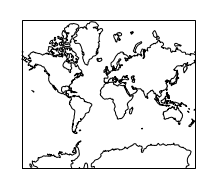

In [21]:
# projeção de Mercator

plt.figure(figsize=(10, 3))
ax = plt.axes(projection=ccrs.Mercator())
ax.coastlines(resolution='110m')
plt.show()

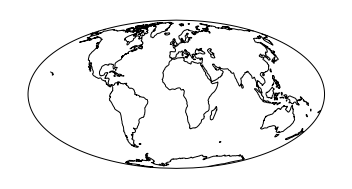

In [22]:
# projeção de Mollweide

plt.figure(figsize=(10, 3))
ax = plt.axes(projection=ccrs.Mollweide())
ax.coastlines(resolution='110m')
plt.show()

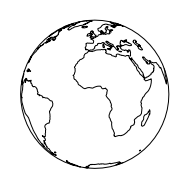

In [23]:
# projeção ortográfica

plt.figure(figsize=(10, 3))
ax = plt.axes(projection=ccrs.Orthographic())
ax.coastlines(resolution='110m')
plt.show()

O parâmetro "central_longitude" pode ser empregado para definir a longitude central da projeção.

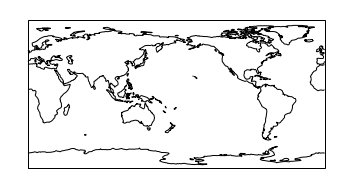

In [24]:
plt.figure(figsize=(10, 3))
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180.))
ax.coastlines(resolution='110m')
plt.show()

#### Exemplo 2: mais detalhes! 

Detalhes na figura podem ser adicionados através da função "add_feature".

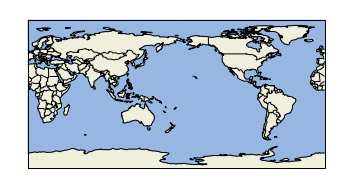

In [25]:
plt.figure(figsize=(10, 3))
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180.))
#ax.coastlines(resolution='110m')

ax.add_feature(cartopy.feature.LAND) # continentes
ax.add_feature(cartopy.feature.OCEAN) # oceanos
ax.add_feature(cartopy.feature.COASTLINE) # contornos nos continentes
ax.add_feature(cartopy.feature.BORDERS) # fronteiras dos países
 
plt.show()

#### Exemplo 3: selecionar regiões específicas do globo.

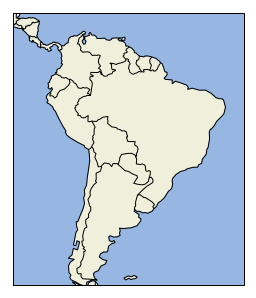

In [26]:
plt.figure(figsize=(10, 5))
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180.))

ax.add_feature(cartopy.feature.LAND) # continentes
ax.add_feature(cartopy.feature.OCEAN) # oceanos
ax.add_feature(cartopy.feature.COASTLINE) # contornos nos continentes
ax.add_feature(cartopy.feature.BORDERS) # fronteiras dos países

# selecionar a américa do sul
ax.set_extent([270, 330, -50, 15]) # [lon, lon, lat, lat]

plt.show()

#### Exemplo 4: melhorar a figura com o Matplotlib.

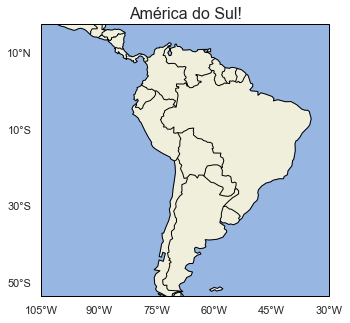

In [27]:
plt.figure(figsize=(10, 5))
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180.))

ax.add_feature(cartopy.feature.LAND) # continentes
ax.add_feature(cartopy.feature.OCEAN) # oceanos
ax.add_feature(cartopy.feature.COASTLINE) # contornos nos continentes
ax.add_feature(cartopy.feature.BORDERS) # fronteiras dos países

# selecionar a américa do sul
ax.set_extent([270, 330, -50, 15]) # [lon, lon, lat, lat]

x_lons = np.arange(-105,-15,15)
y_lats = np.arange(-50,30,20)
tick_fs = 16
ax.set_xticks(x_lons, minor=False, crs=ccrs.PlateCarree())
ax.set_yticks(y_lats, minor=False, crs=ccrs.PlateCarree())
lon_formatter = LongitudeFormatter(zero_direction_label=True,
                                   number_format='.0f')
lat_formatter = LatitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)

plt.title(r'América do Sul!', fontsize=16)

plt.show()

#### Exemplo 5: usando o Natural Earth.

Link: https://www.naturalearthdata.com

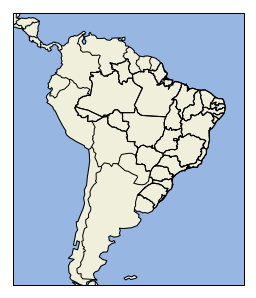

In [28]:
plt.figure(figsize=(10, 5))
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180.))

ax.add_feature(cartopy.feature.LAND) # continentes
ax.add_feature(cartopy.feature.OCEAN) # oceanos
ax.add_feature(cartopy.feature.COASTLINE) # contornos nos continentes
ax.add_feature(cartopy.feature.BORDERS) # fronteiras dos países

# selecionar a américa do sul
ax.set_extent([270, 330, -50, 15]) # [lon, lon, lat, lat]

states = cf.NaturalEarthFeature(category='cultural',
                                scale='50m', facecolor='none',
                               name='admin_1_states_provinces_shp')
ax.add_feature(states, edgecolor='black')

plt.show()

## Xarray

### . Biblioteca para manipulação de arquivos de dados multidimensionais (e.g., Netcdf).

Instalação: conda install -c anaconda xarray

Versão mais recente: 0.10.08

#### Exemplo 1: leitura de dados em netcdf.

Importar biblioteca:

In [29]:
import xarray as xr

In [30]:
# ler conjunto de dados
dset  =  xr.open_dataset('precip.mon.total.1x1.v7.nc')

In [31]:
print (dset)

<xarray.Dataset>
Dimensions:  (lat: 180, lon: 360, time: 1356)
Coordinates:
  * lat      (lat) float32 89.5 88.5 87.5 86.5 85.5 84.5 83.5 82.5 81.5 80.5 ...
  * lon      (lon) float32 0.5 1.5 2.5 3.5 4.5 5.5 6.5 7.5 8.5 9.5 10.5 11.5 ...
  * time     (time) datetime64[ns] 1901-01-01 1901-02-01 1901-03-01 ...
Data variables:
    precip   (time, lat, lon) float64 ...
Attributes:
    Original_Source:  http://www.dwd.de/en/FundE/Klima/KLIS/int/GPCC/GPCC.htm...
    Reference:        Users of the data sets are kindly requested to give fee...
    original_source:  ftp://ftp-anon.dwd.de/pub/data/gpcc/html/download_gate....
    References:       http://www.esrl.noaa.gov/psd/data/gridded/data.gpcc.html
    Conventions:      CF 1.0
    history:          Created 01/2016 based on V7 data obtained via ftp
    title:            GPCC Full Data Reanalysis Version 7 1.0x1.0 Monthly Totals
    dataset_title:    Global Precipitation Climatology Centre (GPCC)


Acima está a descrição completa dos dados, mas ainda não podemos fazer nenhuma manipulação mais complexa...

In [32]:
# extrair variáveis

var   =  dset['precip'][:,:,:]
lat   =  dset['lat']
lon   =  dset['lon']

In [33]:
print (var.shape, lat.shape, lon.shape)

(1356, 180, 360) (180,) (360,)


A variável 'precip' possui três dimensões: (tempo, latitude, longitude).

In [34]:
print (var)

<xarray.DataArray 'precip' (time: 1356, lat: 180, lon: 360)>
[87868800 values with dtype=float64]
Coordinates:
  * lat      (lat) float32 89.5 88.5 87.5 86.5 85.5 84.5 83.5 82.5 81.5 80.5 ...
  * lon      (lon) float32 0.5 1.5 2.5 3.5 4.5 5.5 6.5 7.5 8.5 9.5 10.5 11.5 ...
  * time     (time) datetime64[ns] 1901-01-01 1901-02-01 1901-03-01 ...
Attributes:
    long_name:     GPCC Monthly total of precipitation
    statistic:     Total
    valid_range:   [   0. 8000.]
    parent_stat:   Observations
    var_desc:      Precipitation
    actual_range:  [   0.   3153.04]
    dataset:       GPCC Precipitation 1.0degree V7 Full Reanalysis
    units:         mm
    level:         Surface


Como plotar os dados de precipitação?

IllegalArgumentException: Invalid number of points in LinearRing found 3 - must be 0 or >= 4
Shell is not a LinearRing


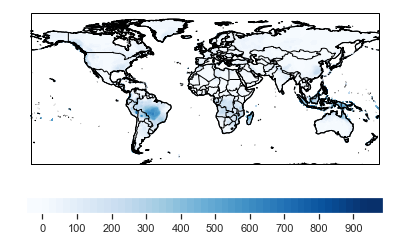

In [35]:
plt.figure(figsize=(8,4))
proj  =  ccrs.PlateCarree()
ax = plt.axes(projection=proj)
             
ax.add_feature(cf.BORDERS)
ax.add_feature(cf.COASTLINE)
ax.coastlines(resolution='50m',color='black')

plt.contourf(lon, lat, var[0,:,:], 60,
             transform=proj,
             cmap=plt.get_cmap('Blues'),
             extend='both')

plt.colorbar(ax=ax, shrink=0.8, orientation='horizontal',
             extendrect=True)


#plt.tight_layout()
plt.show()


Podemos definir um intervalo de contorno qualquer de uma forma bem simples usando numpy:

In [36]:
inter  =  np.arange(0,500,50)

print(inter)

[  0  50 100 150 200 250 300 350 400 450]


IllegalArgumentException: Invalid number of points in LinearRing found 3 - must be 0 or >= 4
Shell is not a LinearRing
IllegalArgumentException: Invalid number of points in LinearRing found 3 - must be 0 or >= 4
Shell is not a LinearRing
IllegalArgumentException: Invalid number of points in LinearRing found 3 - must be 0 or >= 4
Shell is not a LinearRing
IllegalArgumentException: Invalid number of points in LinearRing found 3 - must be 0 or >= 4
Shell is not a LinearRing
IllegalArgumentException: Invalid number of points in LinearRing found 3 - must be 0 or >= 4
Shell is not a LinearRing


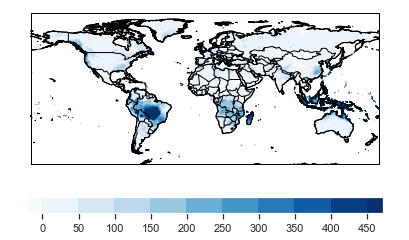

In [37]:
plt.figure(figsize=(8,4))
proj  =  ccrs.PlateCarree()
ax = plt.axes(projection=proj)
             
ax.add_feature(cf.BORDERS)
ax.add_feature(cf.COASTLINE)
ax.coastlines(resolution='50m',color='black')

plt.contourf(lon, lat, var[0,:,:], inter,
             transform=proj,
             cmap=plt.get_cmap('Blues'),
             extend='both')

plt.colorbar(ax=ax, shrink=0.8, orientation='horizontal',
             extendrect=True)


#plt.tight_layout()
plt.show()

#### Exemplo 2: selecionar áreas e tempos específicos no globo

In [38]:
print (dset['time'])

<xarray.DataArray 'time' (time: 1356)>
array(['1901-01-01T00:00:00.000000000', '1901-02-01T00:00:00.000000000',
       '1901-03-01T00:00:00.000000000', ..., '2013-10-01T00:00:00.000000000',
       '2013-11-01T00:00:00.000000000', '2013-12-01T00:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 1901-01-01 1901-02-01 1901-03-01 ...
Attributes:
    long_name:           Time
    delta_t:             0000-01-00 00:00:00
    avg_period:          0000-01-00 00:00:00
    standard_name:       time
    axis:                T
    coordinate_defines:  start
    actual_range:        [36889. 78131.]


A utilidade do parâmetro 'sel':

In [39]:
# selecionar a região da américa do sul

var = var.sel(lat=slice(12, -50),
              lon=slice(270, 330),
              time=slice('1981-1-1', '2010-12-1'))
print (var.shape)
print (var.shape)

(360, 62, 60)
(360, 62, 60)


In [40]:
lon = var['lon']
lat = var['lat']
print(lon.shape, lat.shape)

(60,) (62,)


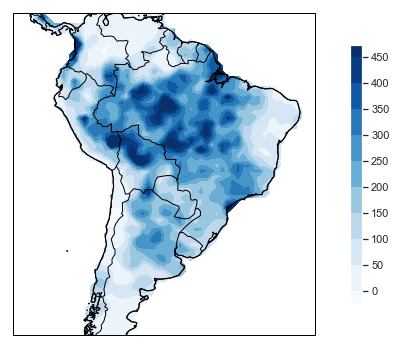

In [41]:
plt.figure(figsize=(10,5))
proj  =  ccrs.PlateCarree()
ax = plt.axes(projection=proj)
             
ax.add_feature(cf.BORDERS)
ax.add_feature(cf.COASTLINE)
ax.coastlines(resolution='50m',color='black')

plt.contourf(lon, lat, var[0,:,:], inter,
             transform=proj,
             cmap=plt.get_cmap('Blues'),
             extend='both')

plt.colorbar(ax=ax, shrink=0.8, orientation='vertical',
             extendrect=True)


plt.tight_layout()
plt.show()

#### Exemplo 3: médias e outros cálculos em ponto de grade.

In [42]:
med  =  var.groupby('time.month').mean('time')

print (var.shape, med.shape)

(360, 62, 60) (12, 62, 60)


O Xarray também dá a opção de salvar em netcdf qualquer variável que você tenha interesse.

In [45]:
print (type(med))

<class 'xarray.core.dataarray.DataArray'>


In [46]:
# salvar ciclo anual
med.to_netcdf('cicloanual.nc')

Como plotar o ciclo anual da melhor forma possível?

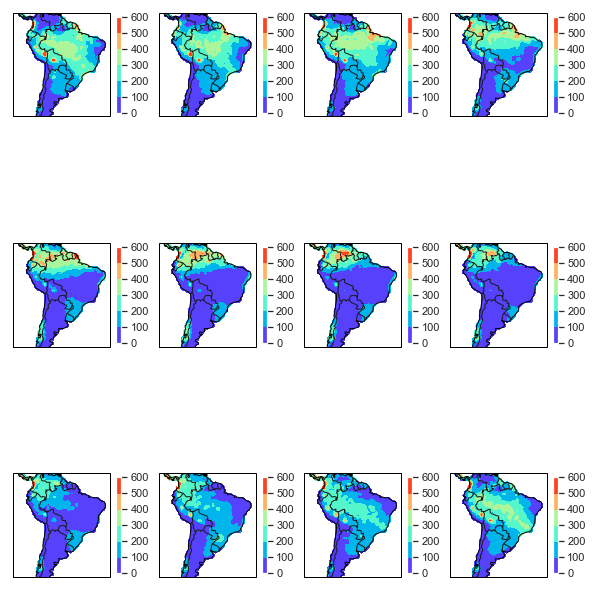

In [55]:
interval  = np.arange(0,700,100)
proj      =  ccrs.PlateCarree()     # cartopy projection

fig, axes = plt.subplots(figsize=(10,12),nrows = 3, 
						 ncols = 4, subplot_kw={'projection': proj})

axes = axes.flatten()

for i, month in enumerate(range(1,13,1)):
    ax = axes[i]
    ax.add_feature(cf.BORDERS,zorder=2,edgecolor='k')        
    ax.add_feature(cartopy.feature.COASTLINE)                
    
    data = ax.contourf(lon,lat,med[i,:,:],interval,
                       transform = proj,
                       cmap = 'rainbow')
    fig.colorbar(data, ax=ax, shrink=0.5)

#plt.tight_layout()

plt.show()

Como calcular anomalias?

In [58]:
anom  =  var.groupby('time.month') - med

#### Exemplo 4: média global de temperatura.

In [59]:
dset  =  xr.open_dataset('sst.mnmean.nc')

In [60]:
var   =  dset['sst'][:,:,:]
lat   =  var['lat']
lon   =  var['lon']

print(var.shape, lat.shape, lon.shape)

(1965, 89, 180) (89,) (180,)


In [65]:
# média anual em ponto de grade
med  =  var.groupby('time.year').mean('time')

# média global em área
med  =  med.mean(dim = ('lat','lon'), skipna = True)

In [66]:
print (med.shape)

(164,)


Média global feita. E agora, pra plotar?

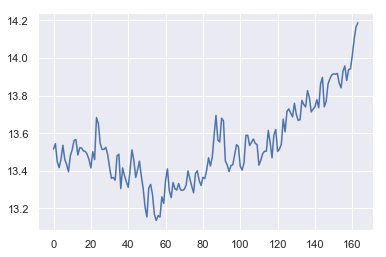

In [67]:
sns.lineplot(data=med)
plt.show()

## Outros pacotes úteis:

.[SciPy](https://docs.scipy.org/doc/scipy/reference/): Estatística, Análise de Sinais, Equações Diferenciais, Álgebra Linear...

.[MetPy](https://www.unidata.ucar.edu/software/metpy/): Diagramas Termodinâmicos (skew-T log-P), Cálculo de Advecção, Vorticidade...

.[Waipy](https://wavelet-analysis.readthedocs.io/en/latest/cookbook.html): Aplicações de Ondeletas.

.[Windspharm](https://ajdawson.github.io/windspharm/latest/): Funções de Corrente, Velocidade Potencial, Vento Divergente...

.[eofs](https://ajdawson.github.io/eofs/): Funções Ortogonais Empíricas.

.[PyART](http://arm-doe.github.io/pyart/): Processamento e Análise de Dados de Radar.

### Obrigado pela atenção!

Até a próxima!